In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
plt.style.use('ggplot')

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
SALES_DATA=pd.read_csv('SALES_DATA.csv')

In [5]:
SALES_DATA.info()
SALES_DATA.head(10)
SALES_DATA.columns

# There is no missing value 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566309 entries, 0 to 566308
Data columns (total 16 columns):
InvoiceNo           566309 non-null object
StockCode           566309 non-null object
Quantity Shipped    566309 non-null float64
Year                566309 non-null object
Invoice Date        566309 non-null object
UnitPrice           566309 non-null float64
Ext-Price           566309 non-null float64
CustomerID          566309 non-null int64
Country             566309 non-null object
GM%                 566309 non-null object
Shipper             566309 non-null object
COST                566309 non-null object
EXT COST            566309 non-null float64
REGION              566309 non-null object
SALES P             566309 non-null object
Unnamed: 15         166199 non-null float64
dtypes: float64(5), int64(1), object(10)
memory usage: 69.1+ MB


,InvoiceNo,StockCode,Quantity Shipped,Year,Invoice Date,UnitPrice,Ext-Price,CustomerID,Country,GM%,Shipper,COST,EXT COST,REGION,SALES P,Unnamed: 15
0,568200,PADS,5.000,"2,017",09/25/17,1.000,5.00,16198,United Kingdom,0%,Delivery Truck,1,4.999763,SOUTH,GRACE J,NaN
1,568375,BANK CHARGES,5.000,"2,017",09/26/17,1.000,5.00,13405,United Kingdom,100%,UPS Next day Air,-,0.000000,WEST,JEFF Y,NaN
2,561226,PADS,5.000,"2,017",07/26/17,1.000,5.00,15618,United Kingdom,0%,Delivery Truck,1,4.999763,SOUTH,GRACE J,NaN
3,2550193,PADS,7.080,"2,018",06/08/18,1.000,7.08,13952,United Kingdom,0%,UPS ground 2nd day,1,7.079664,CENTRAL,PETER T,NaN
4,550193,PADS,5.000,"2,017",04/15/17,1.000,5.00,13952,United Kingdom,0%,UPS ground 2nd day,1,4.999763,CENTRAL,PETER T,NaN
5,561047,16045,1.075,"2,017",07/24/17,1.004,1.08,16948,United Kingdom,0%,UPS ground 2nd day,1.01,1.080605,WEST,JEFF Y,NaN
6,560259,16045,6.450,"2,017",07/17/17,1.007,6.50,13654,United Kingdom,0%,UPS Next day Air,1.01,6.483628,CENTRAL,GAIL H,NaN
7,2558389,16045,46.956,"2,018",07/09/18,1.001,47.00,14383,United Kingdom,0%,UPS Next day Air,1.01,47.200809,SOUTH,GRACE J,NaN
8,558389,16045,3.225,"2,017",06/29/17,1.012,3.26,14383,United Kingdom,1%,UPS Next day Air,1.01,3.241814,SOUTH,GRACE J,NaN
9,C536757,84347,2.000,"2,016",12/02/16,1.003,2.01,15838,United Kingdom,24%,UPS ground 2nd day,0.76,1.522598,NORTH,JOHN A,NaN


Index(['InvoiceNo', 'StockCode', 'Quantity Shipped', 'Year', 'Invoice Date',
       'UnitPrice', 'Ext-Price', 'CustomerID', 'Country', 'GM%', 'Shipper',
       'COST', 'EXT COST', 'REGION', 'SALES P', 'Unnamed: 15'],
      dtype='object')

In [6]:
del SALES_DATA['Unnamed: 15']

In [7]:
SALES_DATA=SALES_DATA[SALES_DATA['Invoice Date']!='2/29/2018']

SALES_DATA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566076 entries, 0 to 566308
Data columns (total 15 columns):
InvoiceNo           566076 non-null object
StockCode           566076 non-null object
Quantity Shipped    566076 non-null float64
Year                566076 non-null object
Invoice Date        566076 non-null object
UnitPrice           566076 non-null float64
Ext-Price           566076 non-null float64
CustomerID          566076 non-null int64
Country             566076 non-null object
GM%                 566076 non-null object
Shipper             566076 non-null object
COST                566076 non-null object
EXT COST            566076 non-null float64
REGION              566076 non-null object
SALES P             566076 non-null object
dtypes: float64(4), int64(1), object(10)
memory usage: 69.1+ MB


In [8]:
SALES_DATA['Invoice Date'] = pd.to_datetime(SALES_DATA['Invoice Date'])

lat_date=SALES_DATA['Invoice Date'].max()
print('The latest invoice date is:', lat_date)
ear_date=SALES_DATA['Invoice Date'].min()
print('The earliest invoice date is:', ear_date)

The latest invoice date is: 2018-12-27 00:00:00
The earliest invoice date is: 2016-12-01 00:00:00


In [9]:
cust=SALES_DATA[['CustomerID']].drop_duplicates()
print("No of customers are:", len(cust))

No of customers are: 4146


In [10]:
coun=SALES_DATA['Country'].drop_duplicates()
print("No of countires are:", len(coun))

SALES_DATA['Country'].unique()

No of countires are: 38


array(['United Kingdom', 'EIRE', 'Germany', 'France', 'Israel', 'Austria',
       'Norway', 'Finland', 'Spain', 'Belgium', 'Switzerland', 'Portugal',
       'Netherlands', 'Singapore', 'Japan', 'Sweden', 'Malta', 'Greece',
       'Hong Kong', 'Unspecified', 'Cyprus', 'Canada',
       'United Arab Emirates', 'Australia', 'Italy', 'Channel Islands',
       'Denmark', 'USA', 'Poland', 'Iceland', 'Czech Republic', 'RSA',
       'European Community', 'Lebanon', 'Saudi Arabia', 'Lithuania',
       'Bahrain', 'Brazil'], dtype=object)

In [11]:
# Checking country wise customer distribution:

In [12]:
cust_country=SALES_DATA[['Country','CustomerID']].drop_duplicates()

cust_country_count=cust_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID',ascending=False)
cust_country_count

,Country,CustomerID
36,United Kingdom,3753
14,Germany,91
13,France,88
10,EIRE,31
31,Spain,30
3,Belgium,24
33,Switzerland,22
27,Portugal,18
19,Italy,13
12,Finland,11


<Figure size 864x576 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

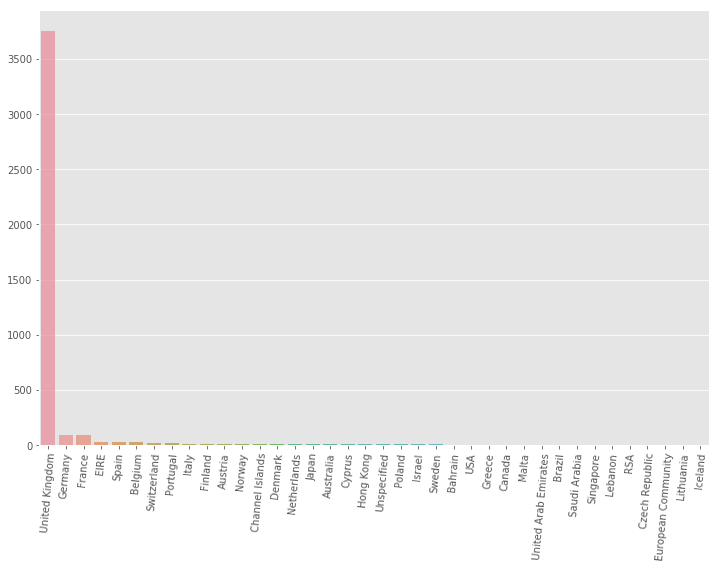

In [13]:
country=list(cust_country_count['Country'])
cust_id=list(cust_country_count['CustomerID'])
plt.figure(figsize=(12,8))
sns.barplot(country, cust_id, alpha=0.8)
plt.xticks(rotation='85')

# It can be seen from the graph that around 90% of the customers exist in United Kingdom only followed by Germany and France. 
# Hence, the company should focus on the United Kingdom for it marketing and other strategies.

In [14]:
sales_data_UK=SALES_DATA.loc[SALES_DATA['Country']=='United Kingdom']

In [15]:
columns=['InvoiceNo', 'StockCode','Invoice Date', 'CustomerID', 'Country', 'Shipper', 'REGION', 'SALES P']

In [16]:
def unique_counts(df):
    for i in columns:
        counts=df[i].nunique()
        print(i, ": ", counts)
unique_counts(sales_data_UK)

InvoiceNo :  22742
StockCode :  3894
Invoice Date :  656
CustomerID :  3753
Country :  1
Shipper :  4
REGION :  4
SALES P :  6


In [17]:
# Recency (R): 

In [18]:
cust_date_UK=SALES_DATA[SALES_DATA['Country']=='United Kingdom']
cust_date_UK=cust_date_UK[['CustomerID','Invoice Date']].drop_duplicates()

In [19]:
import datetime as dt
l1=dt.datetime(2017,4,30)
l2=dt.datetime(2017,9,30)
l3=dt.datetime(2018,2,28)
l4=dt.datetime(2018,7,31)

In [20]:
def f(row):
    if row['Invoice Date'] <= l1:
        val = 1
    elif row['Invoice Date'] > l1 and row['Invoice Date'] <= l2:
        val = 2
    elif row['Invoice Date'] > l2 and row['Invoice Date'] <= l3:
        val = 3
    elif row['Invoice Date'] > l3 and row['Invoice Date'] <= l4:
        val = 4
    else:
        val = 5
    return val

In [21]:
cust_date_UK['Recency_Flag']=cust_date_UK.apply(f, axis=1)
cust_date_UK=cust_date_UK.groupby('CustomerID', as_index=False)['Recency_Flag'].max()

In [22]:
cust_date_UK['Recency_Flag'].value_counts()

5    2073
3     898
2     411
4     279
1      92
Name: Recency_Flag, dtype: int64

<Figure size 864x576 with 0 Axes>

Text(0,0.5,'Count')

Text(0.5,0,'Recency_Flag')

Text(0.5,1,'Frequency of Recency_Flag')

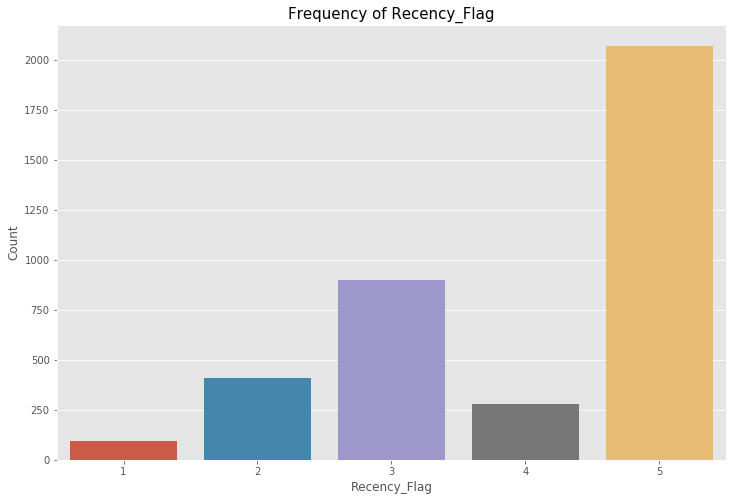

In [23]:
plt.figure(figsize=(12,8))
sns.countplot(x='Recency_Flag', data=cust_date_UK)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Recency_Flag', fontsize=12)
plt.title('Frequency of Recency_Flag', fontsize=15)

In [24]:
# Frequency (F):

In [25]:
cust_freq=SALES_DATA[['Country','InvoiceNo','CustomerID']].drop_duplicates()

cust_freq_count=cust_freq.groupby(['Country','CustomerID'])['InvoiceNo'].aggregate('count').reset_index().sort_values(by='InvoiceNo', ascending=False)
cust_freq_count_UK=cust_freq_count[cust_freq_count['Country']=='United Kingdom']

In [26]:
unique_invoice=cust_freq_count_UK[['InvoiceNo']].drop_duplicates()
unique_invoice['Frequency_Band']=pd.qcut(unique_invoice['InvoiceNo'], 5)
unique_invoice=unique_invoice[['Frequency_Band']].drop_duplicates()
unique_invoice

,Frequency_Band
456,"(62.0, 250.0]"
1842,"(42.4, 62.0]"
642,"(28.6, 42.4]"
3791,"(14.8, 28.6]"
3525,"(0.999, 14.8]"


In [27]:
def f(row):
    if row['InvoiceNo'] <= 14:
        val = 1
    elif row['InvoiceNo'] > 14 and row['InvoiceNo'] <= 28:
        val = 2
    elif row['InvoiceNo'] > 28 and row['InvoiceNo'] <= 42:
        val = 3
    elif row['InvoiceNo'] > 42 and row['InvoiceNo'] <= 62:
        val = 4
    else:
        val = 5
    return val

In [28]:
cust_freq_count_UK['Freq_Flag']=cust_freq_count_UK.apply(f, axis=1)

C:\Users\zf295\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
cust_freq_count_UK['Freq_Flag'].value_counts()

1    3414
2     237
3      58
4      27
5      17
Name: Freq_Flag, dtype: int64

<Figure size 864x576 with 0 Axes>

Text(0,0.5,'Count')

Text(0.5,0,'Freq_Flag')

Text(0.5,1,'Frequency of Freq_Flag')

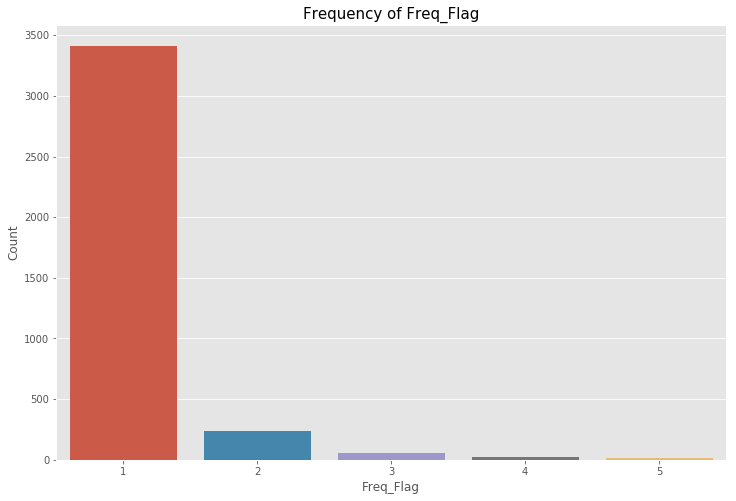

In [30]:
plt.figure(figsize=(12,8))
sns.countplot(x='Freq_Flag', data=cust_freq_count_UK)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Freq_Flag', fontsize=12)
plt.title('Frequency of Freq_Flag', fontsize=15)

In [31]:
# Monetary Value (M):

In [32]:
cust_monetory=SALES_DATA.groupby(['Country','CustomerID'])['Ext-Price'].aggregate('sum').reset_index().sort_values(by='Ext-Price', ascending=False)
cust_monetory_UK=cust_monetory[cust_monetory['Country']=='United Kingdom']

In [33]:
unique_price=cust_monetory_UK[['Ext-Price']].drop_duplicates()
unique_price['monetory_Band']=pd.qcut(unique_price['Ext-Price'], 5)
unique_price=unique_price[['monetory_Band']].drop_duplicates()
unique_price

,monetory_Band
449,"(8917.816, 750867.97]"
2040,"(3142.73, 8917.816]"
3242,"(1233.528, 3142.73]"
2895,"(431.062, 1233.528]"
2487,"(1.0190000000000001, 431.062]"


In [34]:
def f(row):
    if row['Ext-Price'] <= 431:
        val = 1
    elif row['Ext-Price'] > 431 and row['Ext-Price'] <= 1233:
        val = 2
    elif row['Ext-Price'] > 1233 and row['Ext-Price'] <= 3142:
        val = 3
    elif row['Ext-Price'] > 3142 and row['Ext-Price'] <= 8917:
        val = 4
    else:
        val = 5
    return val

In [35]:
cust_monetory_UK['Monetory_Flag']=cust_monetory_UK.apply(f, axis=1)

C:\Users\zf295\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
cust_monetory_UK['Monetory_Flag'].value_counts()

1    753
5    750
3    750
4    750
2    750
Name: Monetory_Flag, dtype: int64

<Figure size 864x576 with 0 Axes>

Text(0,0.5,'Count')

Text(0.5,0,'Monetory_Flag')

Text(0.5,1,'Frequency of Monetory_Flag')

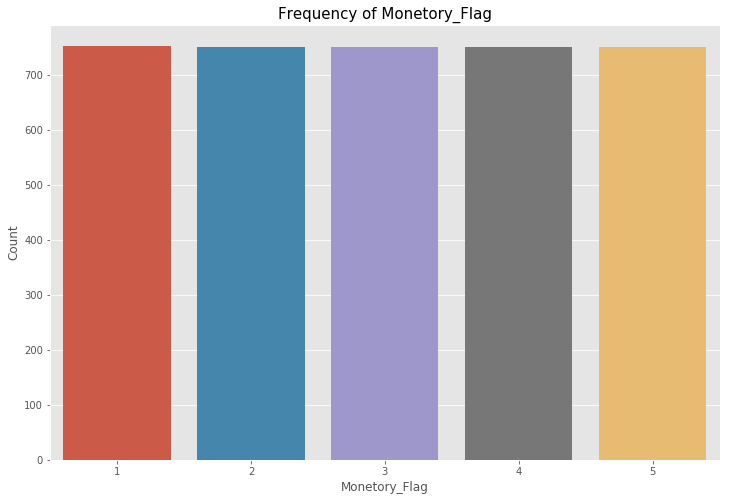

In [37]:
plt.figure(figsize=(12,8))
sns.countplot(x='Monetory_Flag', data=cust_monetory_UK)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Monetory_Flag', fontsize=12)
plt.title('Frequency of Monetory_Flag', fontsize=15)

In [38]:
NOW=dt.datetime(2018,12,27)

In [39]:
rfmTable=SALES_DATA.groupby('CustomerID').agg({'Invoice Date': lambda x: (NOW - x.max()).days, 'InvoiceNo': lambda x: len(x), 'Ext-Price': lambda x: x.sum()})
rfmTable['Invoice Date']=rfmTable['Invoice Date'].astype(int)
rfmTable.rename(columns={'Invoice Date': 'recency', 
                         'InvoiceNo': 'frequency', 
                         'Ext-Price': 'monetary_value'}, inplace=True)
rfmTable.head(10)

,recency,frequency,monetary_value
CustomerID,,,
12346,232,2,750867.97
12347,21,221,22725.40
12348,12,50,20105.77
12349,401,69,982.19
12350,148,33,1000.91
12352,100,73,1861.92
12353,82,8,371.31
12354,69,105,18197.91
12355,51,12,1793.56


In [40]:
cust_UK_All=pd.merge(cust_date_UK,cust_freq_count_UK[['CustomerID','Freq_Flag']],on=['CustomerID'])
cust_UK_All=pd.merge(cust_UK_All,cust_monetory_UK[['CustomerID','Monetory_Flag']],on=['CustomerID'])
cust_UK_All.head(10)

,CustomerID,Recency_Flag,Freq_Flag,Monetory_Flag
0,12346,4,1,5
1,12431,5,1,5
2,12433,5,2,5
3,12471,5,2,5
4,12583,5,1,5
5,12682,5,2,5
6,12747,5,1,4
7,12748,5,5,5
8,12749,5,1,5
9,12820,4,1,2


In [41]:
segmented_rfm=pd.merge(rfmTable,cust_UK_All,on=['CustomerID'])
segmented_rfm.head(10)

,CustomerID,recency,frequency,monetary_value,Recency_Flag,Freq_Flag,Monetory_Flag
0,12346,232,2,750867.97,4,1,5
1,12431,8,1211,69343.31,5,1,5
2,12433,7,1494,108671.55,5,2,5
3,12471,8,3456,267628.11,5,2,5
4,12583,14,1136,93257.92,5,1,5
5,12682,9,1375,84690.52,5,2,5
6,12747,13,98,3531.97,5,1,4
7,12748,4,5010,193697.36,5,5,5
8,12749,50,226,10592.88,5,1,5
9,12820,174,66,983.55,4,1,2


In [42]:
segmented_rfm['RFMScore']=segmented_rfm['Recency_Flag'].map(str)+segmented_rfm['Freq_Flag'].map(str)+segmented_rfm['Monetory_Flag'].map(str)
segmented_rfm.head(10)

,CustomerID,recency,frequency,monetary_value,Recency_Flag,Freq_Flag,Monetory_Flag,RFMScore
0,12346,232,2,750867.97,4,1,5,415
1,12431,8,1211,69343.31,5,1,5,515
2,12433,7,1494,108671.55,5,2,5,525
3,12471,8,3456,267628.11,5,2,5,525
4,12583,14,1136,93257.92,5,1,5,515
5,12682,9,1375,84690.52,5,2,5,525
6,12747,13,98,3531.97,5,1,4,514
7,12748,4,5010,193697.36,5,5,5,555
8,12749,50,226,10592.88,5,1,5,515
9,12820,174,66,983.55,4,1,2,412


In [43]:
# The top 10 customers of the company
segmented_rfm[segmented_rfm['RFMScore']=='555'].sort_values('monetary_value',ascending=False).head(10)

,CustomerID,recency,frequency,monetary_value,Recency_Flag,Freq_Flag,Monetory_Flag,RFMScore
2209,16029,2,2072,481705.99,5,5,5,555
3620,18102,19,452,450669.35,5,5,5,555
3442,17841,2,8854,391481.22,5,5,5,555
601,13694,9,2117,280134.23,5,5,5,555
189,13089,8,2280,251996.90,5,5,5,555
412,13408,7,2039,247207.52,5,5,5,555
1529,15061,13,639,230242.87,5,5,5,555
657,13767,7,2992,218324.34,5,5,5,555
1231,14606,2,4174,200748.86,5,5,5,555
7,12748,4,5010,193697.36,5,5,5,555
